This lab on Subset Selection in R comes from p. 244-247 of "Introduction to Statistical Learning with Applications in R" by Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani. It was re-implemented in Fall 2016 in `tidyverse` format by Amelia McNamara and R. Jordan Crouser at Smith College.


# 6.5.1 Best Subset Selection

Here we apply the best subset selection approach to the `Hitters` data. We
wish to predict a baseball player’s `Salary` on the basis of various statistics
associated with performance in the previous year. Let's take a quick look:

In [1]:
list.of.packages <- c("dplyr","ISLR","leaps")
new.packages <- list.of.packages[!(list.of.packages %in% installed.packages()[,"Package"])]
if(length(new.packages)) install.packages(new.packages)

In [2]:
library(ISLR)
library(dplyr)
head(Hitters)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
-Andy Allanson,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NA,A
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


First of all, we note that the `Salary` variable is missing for some of the
players. The `is.na()` function can be used to identify the missing observations. It returns a vector of the same length as the input vector, with a `TRUE` value
for any elements that are missing, and a `FALSE` value for non-missing elements.
The `sum()` function can then be used to count all of the missing elements:

In [3]:
Hitters %>%
  select(Salary) %>%
  is.na() %>%
  sum()

[1] 59

We see that `Salary` is missing for 59 players. The `na.omit()` function
removes all of the rows that have missing values in any variable:

In [4]:
# Print the dimensions of the original Hitters data (322 rows x 20 columns)
dim(Hitters)

# Drop any rows the contain missing values
Hitters = Hitters %>%
  na.omit()

# Print the dimensions of the modified Hitters data (263 rows x 20 columns)
dim(Hitters)

# One last check: should return 0
Hitters %>%
  is.na() %>%
  sum()

[1] 322  20

[1] 263  20

[1] 0

The `regsubsets()` function (part of the `leaps` library) performs best subset selection by identifying the best model that contains a given number of predictors, where **best** is quantified using RSS. The syntax is the same as for `lm()`. The `summary()` command outputs the best set of variables for
each model size.

In [5]:
library(leaps)
regfit_full = regsubsets(Salary~., data = Hitters)
summary(regfit_full)

Subset selection object
Call: regsubsets.formula(Salary ~ ., data = Hitters)
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: exhaustive
         AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 ) " "   " "  " "   " "  " " " "   " "   " "    " "   " "    " "   "*" 
2  ( 1 ) " "   "*"  " "   " "  " "

An asterisk ("\*") indicates that a given variable is included in the corresponding
model. For instance, this output indicates that the best two-variable model
contains only `Hits` and `CRBI`. By default, `regsubsets()` only reports results
up to the best eight-variable model. But the `nvmax` option can be used
in order to return as many variables as are desired. Here we fit up to a
19-variable model:

In [6]:
regfit_full = regsubsets(Salary~., data = Hitters, nvmax = 19)
reg_summary = summary(regfit_full)

Notice that rather than letting the results of our call to the `summary()` function print to the screen, we've saved the results to a variable called `reg_summary`. That way, we can access just the parts we need. Let's see what's in there:

In [7]:
names(reg_summary)

[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"

Excellent! In addition to the verbose output we get when we print the summary to the screen, the `summary()` function also returns $R^2 (\tt{rsq})$, RSS, adjusted $R^2$, $C_p$, and BIC. We can examine these to try to select the best overall model. Let's start by looking at $R^2$:

In [8]:
reg_summary$rsq

[1] 0.3214501 0.4252237 0.4514294 0.4754067 0.4908036 0.5087146 0.5141227
 [8] 0.5285569 0.5346124 0.5404950 0.5426153 0.5436302 0.5444570 0.5452164
[15] 0.5454692 0.5457656 0.5459518 0.5460945 0.5461159

We see that the $R^2$ statistic increases from 32% when only
one variable is included in the model to almost 55% when all variables
are included. As expected, the $R^2$ statistic increases monotonically as more
variables are included.

Plotting RSS, adjusted $R^2$, $C_p$, and BIC for all of the models at once will
help us decide which model to select. Note the `type="l"` option tells `R` to
connect the plotted points with lines:

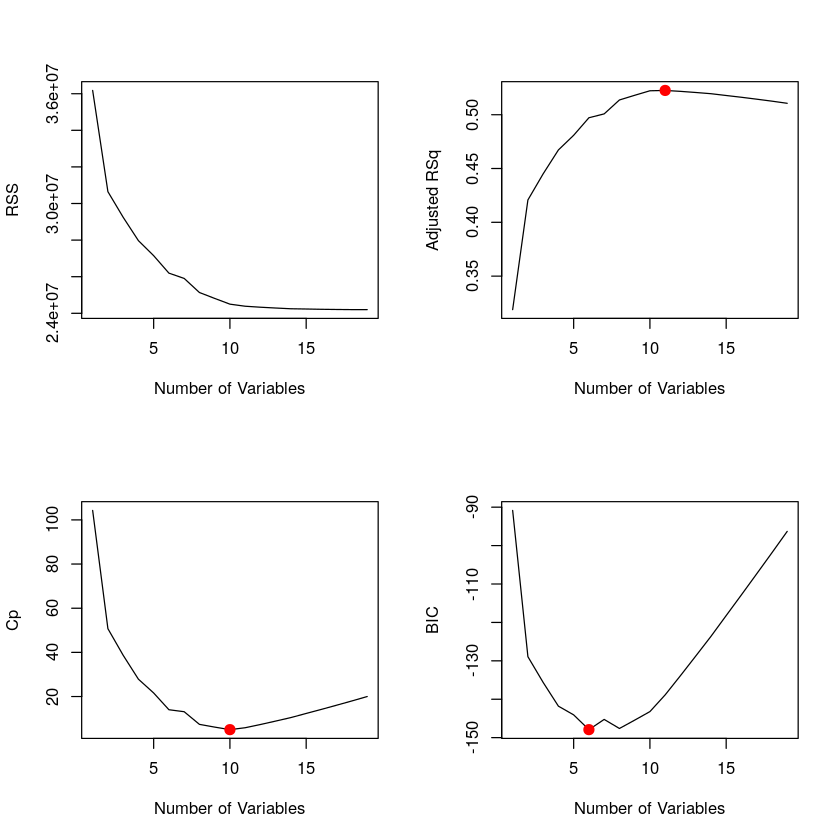

In [9]:
# Set up a 2x2 grid so we can look at 4 plots at once
par(mfrow = c(2,2))
plot(reg_summary$rss, xlab = "Number of Variables", ylab = "RSS", type = "l")
plot(reg_summary$adjr2, xlab = "Number of Variables", ylab = "Adjusted RSq", type = "l")

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The which.max() function can be used to identify the location of the maximum point of a vector
adj_r2_max = which.max(reg_summary$adjr2) # 11

# The points() command works like the plot() command, except that it puts points 
# on a plot that has already been created instead of creating a new plot
points(adj_r2_max, reg_summary$adjr2[adj_r2_max], col ="red", cex = 2, pch = 20)

# We'll do the same for C_p and BIC, this time looking for the models with the SMALLEST statistic
plot(reg_summary$cp, xlab = "Number of Variables", ylab = "Cp", type = "l")
cp_min = which.min(reg_summary$cp) # 10
points(cp_min, reg_summary$cp[cp_min], col = "red", cex = 2, pch = 20)

plot(reg_summary$bic, xlab = "Number of Variables", ylab = "BIC", type = "l")
bic_min = which.min(reg_summary$bic) # 6
points(bic_min, reg_summary$bic[bic_min], col = "red", cex = 2, pch = 20)

Recall that in the second step of our selection process, we narrowed the field down to just one model on any $k<=p$ predictors. We see that according to BIC, the best performer is the model with 6 variables. According to $C_p$, 10 variables. Adjusted $R^2$ suggests that 11 might be best. Again, no one measure is going to give us an entirely accurate picture... but they all agree that a model with 5 or fewer predictors is insufficient, and a model with more than 12 is overfitting.

The `regsubsets()` function has a built-in `plot()` command which can
be used to display the selected variables for the best model with a given
number of predictors, ranked according to a chosen statistic.  The top row of each plot contains a black square for each variable selected according to the optimal model associated with that statistic. 

To find out more about this function, type `?plot.regsubsets`.

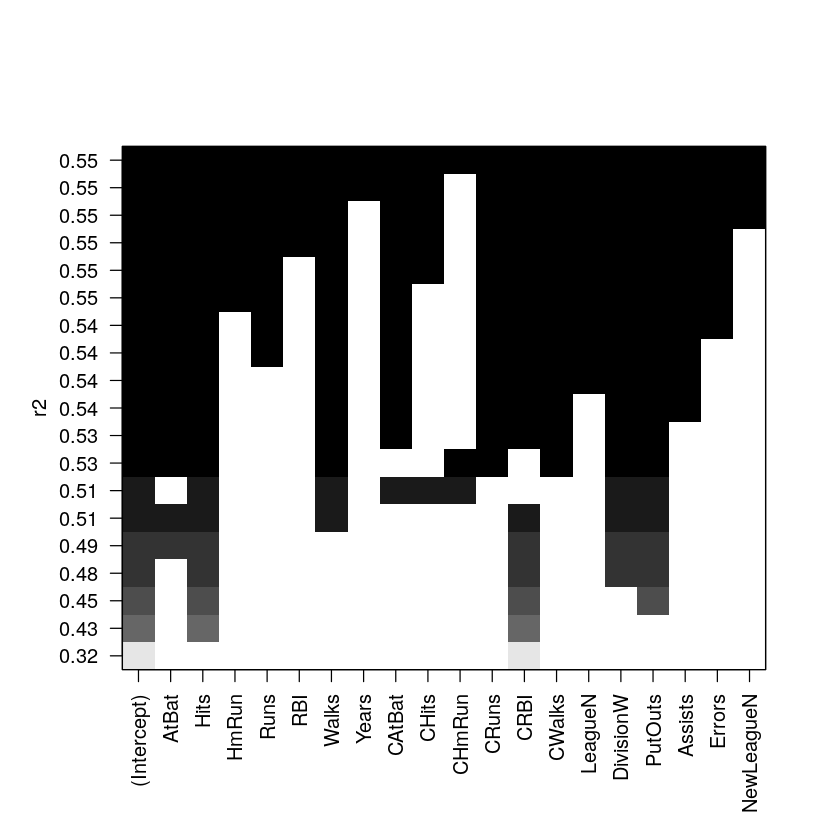

In [10]:
plot(regfit_full, scale = "r2")

As expected, $R^2$ is maximized by the model that contains all 20 predictors.

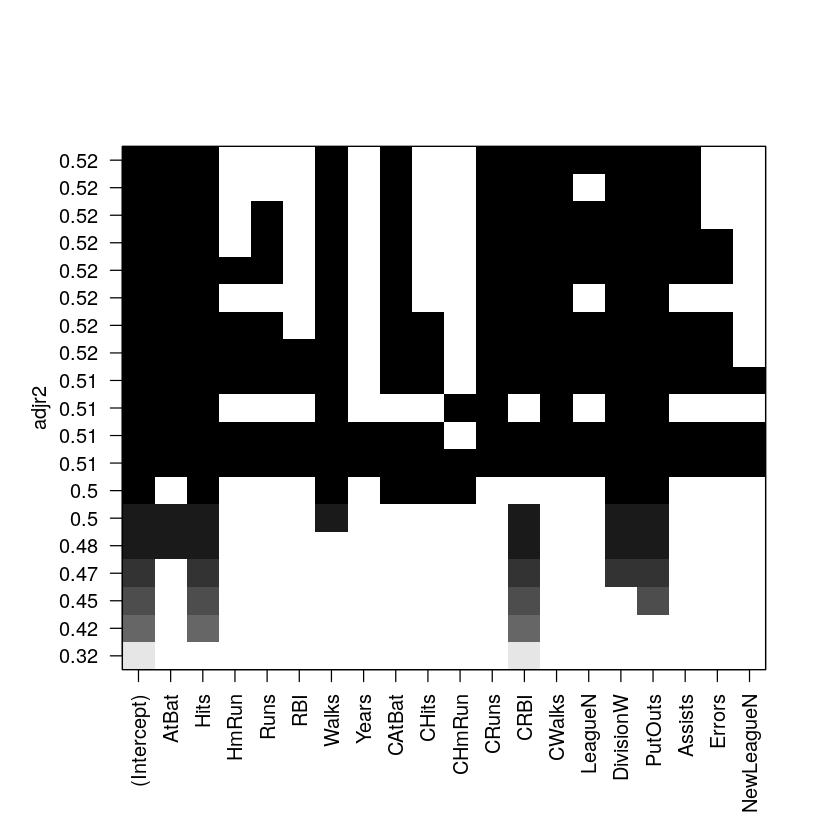

In [11]:
plot(regfit_full, scale = "adjr2")

Adjusted $R^2$ downselects to just 11 predictors. We can use the `coef()` function to see which predictors made the cut:

In [12]:
coef(regfit_full, 11)

(Intercept)        AtBat         Hits        Walks       CAtBat        CRuns 
 135.7512195   -2.1277482    6.9236994    5.6202755   -0.1389914    1.4553310 
        CRBI       CWalks      LeagueN    DivisionW      PutOuts      Assists 
   0.7852528   -0.8228559   43.1116152 -111.1460252    0.2894087    0.2688277

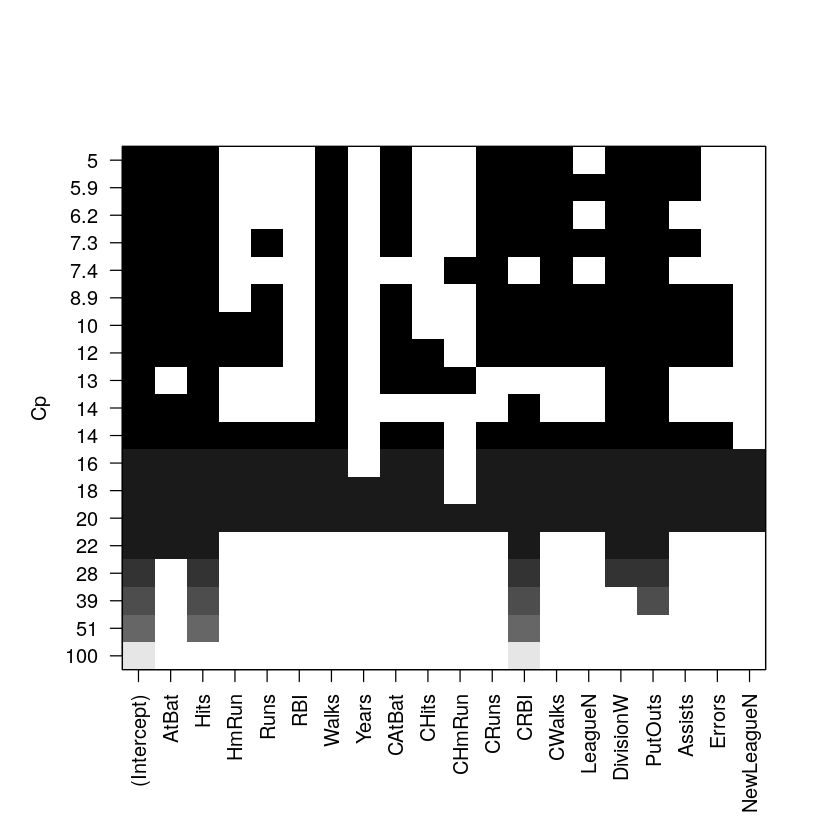

In [13]:
plot(regfit_full, scale = "Cp")

$C_p$ downselects further, dropping the `LeagueN` predictor and bringing the number down to 10:

In [14]:
coef(regfit_full, 10)

(Intercept)        AtBat         Hits        Walks       CAtBat        CRuns 
 162.5354420   -2.1686501    6.9180175    5.7732246   -0.1300798    1.4082490 
        CRBI       CWalks    DivisionW      PutOuts      Assists 
   0.7743122   -0.8308264 -112.3800575    0.2973726    0.2831680

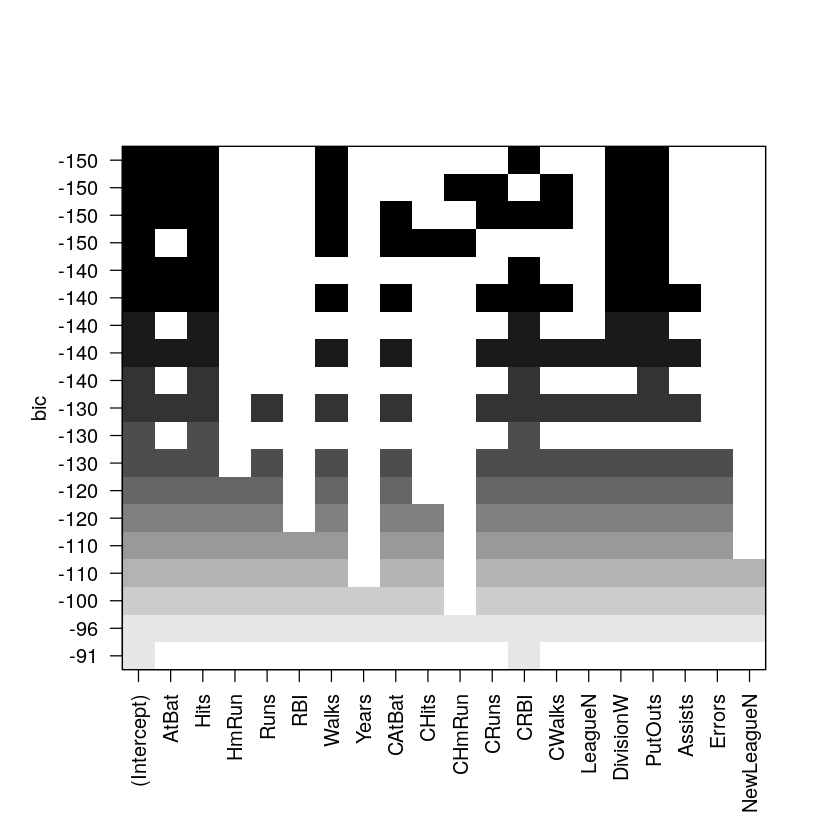

In [15]:
plot(regfit_full, scale = "bic")

We see that several models share a BIC close to −150. However, the model
with the lowest BIC is the six-variable model that contains only `AtBat,
Hits, Walks, CRBI, DivisionW,` and `PutOuts`:

In [16]:
coef(regfit_full, 6)

(Intercept)        AtBat         Hits        Walks         CRBI    DivisionW 
  91.5117981   -1.8685892    7.6043976    3.6976468    0.6430169 -122.9515338 
     PutOuts 
   0.2643076

# 6.5.2 Forward and Backward Stepwise Selection
We can also use the `regsubsets()` function to perform forward stepwise
or backward stepwise selection, using the argument `method="forward"` or
`method="backward"`.

In [17]:
# Forward
regfit_fwd = regsubsets(Salary~., data = Hitters, nvmax = 19, method = "forward")
summary(regfit_fwd)

Subset selection object
Call: regsubsets.formula(Salary ~ ., data = Hitters, nvmax = 19, method = "forward")
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 19
Selection Algorithm: forward
          AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 )  " "   " "  " "   " "  " " " "   " "   " "    " "   " "    " "   "*" 
2 

In [18]:
# Backward
regfit_bwd = regsubsets(Salary~., data = Hitters, nvmax = 19, method = "backward")
summary(regfit_bwd)

Subset selection object
Call: regsubsets.formula(Salary ~ ., data = Hitters, nvmax = 19, method = "backward")
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 19
Selection Algorithm: backward
          AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 )  " "   " "  " "   " "  " " " "   " "   " "    " "   " "    "*"   " " 


We see that using forward stepwise selection, the best onevariable
model contains only `CRBI`, and the best two-variable model additionally
includes `Hits`. For this data, the best one-variable through six-variable
models are each identical for best subset and forward selection.
However, the best seven-variable models identified by forward stepwise selection,
backward stepwise selection, and best subset selection are different.

In [19]:
coef(regfit_full, 7)
coef(regfit_fwd, 7)
coef(regfit_bwd, 7)

(Intercept)         Hits        Walks       CAtBat        CHits       CHmRun 
  79.4509472    1.2833513    3.2274264   -0.3752350    1.4957073    1.4420538 
   DivisionW      PutOuts 
-129.9866432    0.2366813

(Intercept)        AtBat         Hits        Walks         CRBI       CWalks 
 109.7873062   -1.9588851    7.4498772    4.9131401    0.8537622   -0.3053070 
   DivisionW      PutOuts 
-127.1223928    0.2533404

(Intercept)        AtBat         Hits        Walks        CRuns       CWalks 
 105.6487488   -1.9762838    6.7574914    6.0558691    1.1293095   -0.7163346 
   DivisionW      PutOuts 
-116.1692169    0.3028847

# Getting credit
To get credit for this lab, please post an example where you would choose to use each of the following:
- Best subset
- Forward selection
- Backward selection

to [Moodle](https://moodle.smith.edu/mod/quiz/view.php?id=257886)